## 1. Создайте полносвязную сеть для решения задачи классификации цифр MNIST.

In [1]:
import tensorflow as tf
from tensorflow import keras
from keras.datasets import mnist
from keras.utils import to_categorical
from keras.models import Sequential
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from tensorflow.keras import regularizers
from sklearn.metrics import accuracy_score,precision_score,recall_score

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


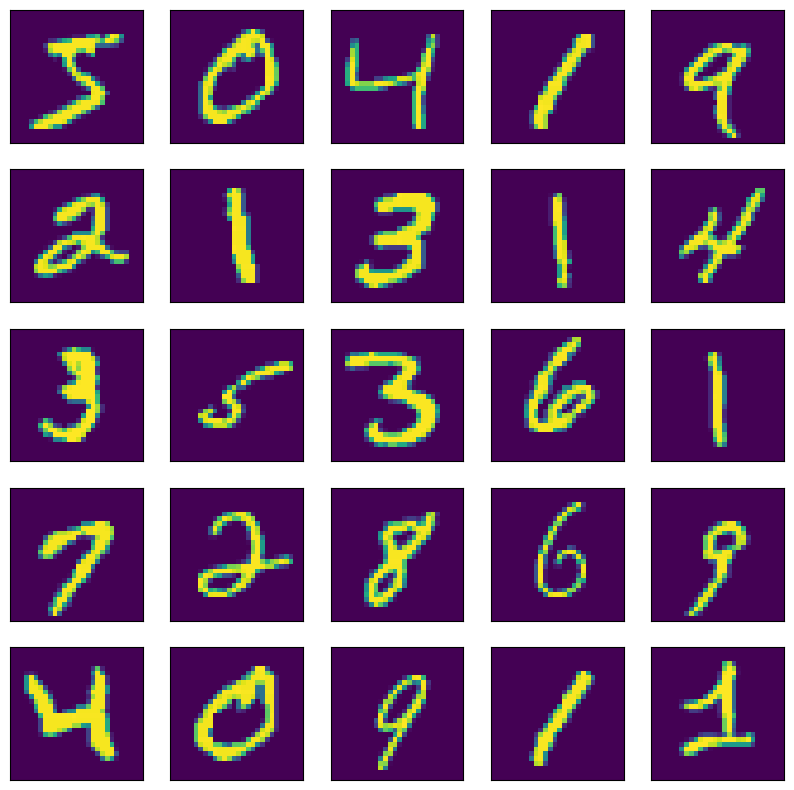

In [2]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

def plot_images(images, labels, n=25):
    plt.figure(figsize=(10,10))
    for i in range(n):
        plt.subplot(5, 5, i+1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        plt.imshow(images[i])
    plt.show()

plot_images(x_train, y_train, n=25)

In [3]:
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

In [4]:
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

In [5]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(60000, 28, 28)
(10000, 28, 28)
(60000, 10)
(10000, 10)


In [6]:
model = tf.keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [7]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 109,386 (427.29 KB)

 Trainable params: 109,386 (427.29 KB)

 Non-trainable params: 0 (0.00 B)

In [8]:
model.compile(optimizer='adam',
               loss='categorical_crossentropy',
               metrics=['accuracy'])

In [9]:
history = model.fit(x_train, y_train,
          epochs=10,
          batch_size=64,
          validation_split=0.2,
          verbose=1)

Epoch 1/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 9s 8ms/step - accuracy: 0.8423 - loss: 0.5468 - val_accuracy: 0.9572 - val_loss: 0.1502
Epoch 2/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.9604 - loss: 0.1331 - val_accuracy: 0.9648 - val_loss: 0.1178
Epoch 3/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.9741 - loss: 0.0869 - val_accuracy: 0.9678 - val_loss: 0.1070
Epoch 4/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.9816 - loss: 0.0603 - val_accuracy: 0.9738 - val_loss: 0.0860
Epoch 5/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 7s 8ms/step - accuracy: 0.9849 - loss: 0.0495 - val_accuracy: 0.9746 - val_loss: 0.0890
Epoch 6/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.9893 - loss: 0.0344 - val_accuracy: 0.9733 - val_loss: 0.0946
Epoch 7/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.9918 - loss: 0.0267 - val_accuracy: 0.9730 - val_loss: 0.0944
Epoch 8/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.9917 - loss: 0.0254 - val_accuracy: 0

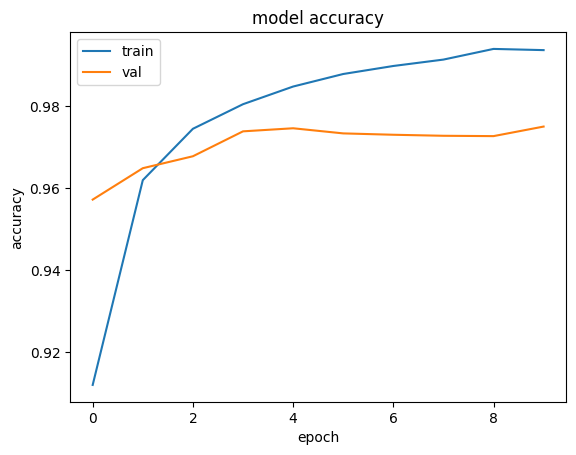

In [10]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

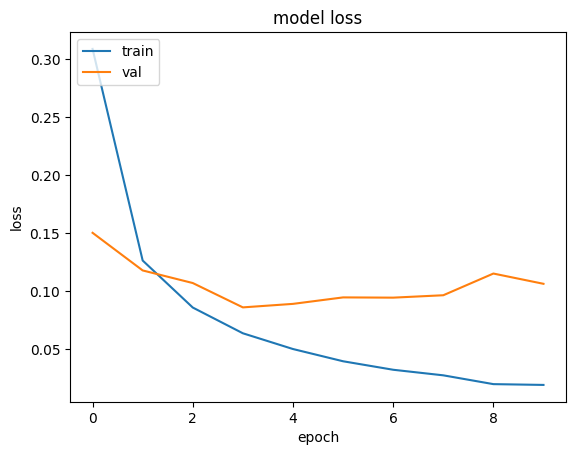

In [11]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [12]:
prediction=model.predict(x_test)
prediction

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


array([[2.6748046e-11, 1.6545319e-11, 5.1166404e-07, ..., 9.9999517e-01,
        5.2049134e-09, 4.0065352e-08],
       [1.4875620e-10, 1.5685209e-05, 9.9998409e-01, ..., 7.3251469e-15,
        1.5966313e-09, 7.0390791e-13],
       [8.5986350e-08, 9.9978828e-01, 6.0626688e-05, ..., 6.4968917e-05,
        6.5704859e-05, 1.9813200e-08],
       ...,
       [7.9332243e-16, 1.1318880e-13, 1.1837081e-14, ..., 3.6982015e-10,
        1.3381745e-13, 2.2833881e-08],
       [3.7262236e-14, 1.4809113e-15, 9.1098573e-16, ..., 1.8382451e-12,
        4.5253492e-07, 1.0973805e-14],
       [3.7876889e-12, 1.5751905e-11, 2.0226621e-11, ..., 8.3816165e-16,
        2.2015774e-13, 6.8052768e-14]], dtype=float32)

In [13]:
prediction_vect = np.array([i.argmax() for i in prediction])
prediction_vect

array([7, 2, 1, ..., 4, 5, 6])

In [14]:
y_test_labels = np.argmax(y_test, axis=1)
df = pd.crosstab(pd.Series(y_test_labels), pd.Series(prediction_vect))
df

col_0,0,1,2,3,4,5,6,7,8,9
row_0,,,,,,,,,,
0,965,0,2,1,5,0,1,3,2,1
1,0,1128,2,1,0,0,2,1,0,1
2,2,1,1013,4,2,0,1,4,5,0
3,0,0,2,988,0,3,1,6,4,6
4,0,0,3,0,954,0,5,1,0,19
5,2,0,0,13,1,861,5,2,3,5
6,4,3,3,1,6,4,934,1,2,0
7,1,2,9,1,2,0,0,1004,0,9
8,3,1,4,15,5,5,1,4,930,6


In [15]:
test_loss, test_acc = model.evaluate(x_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9721 - loss: 0.1061


In [16]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder()
prediction_vect_multilabel = encoder.fit_transform(np.array(prediction_vect).reshape(-1, 1))
prediction_vect_multilabel

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 10000 stored elements and shape (10000, 10)>

In [17]:
print('accuracy:', accuracy_score(y_test, prediction_vect_multilabel))
print('precision:', precision_score(y_test, prediction_vect_multilabel, average='weighted'))
print('recall:', recall_score(y_test, prediction_vect_multilabel, average='weighted'))

accuracy: 0.977
precision: 0.9771182155965862
recall: 0.977


## 2. Создайте полносвязную сеть для решения задачи классификации Fashion MNIST.

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


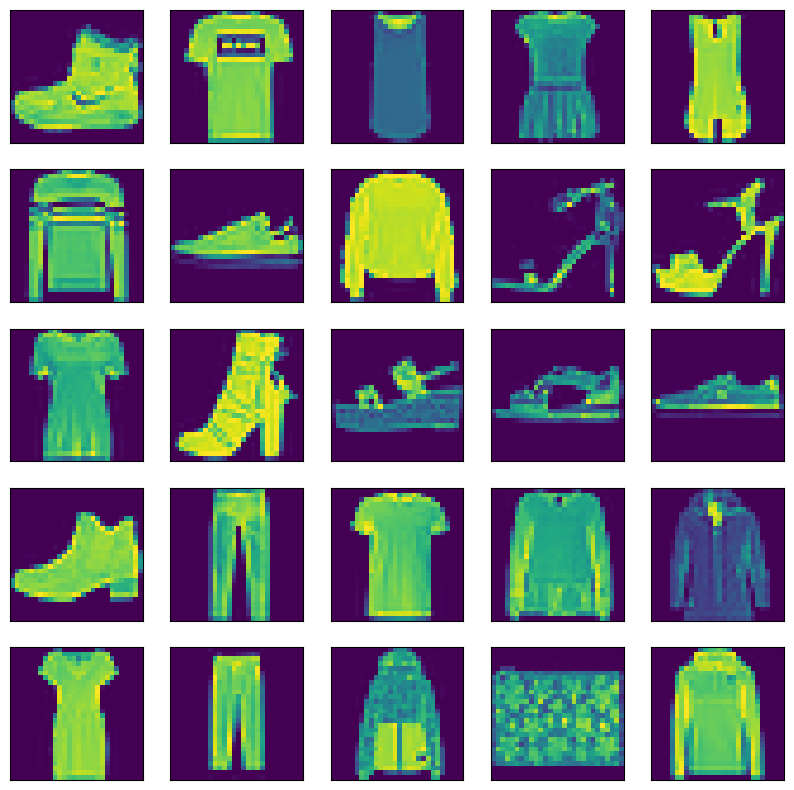

In [18]:
from keras.datasets import fashion_mnist

(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

def plot_images(images, labels, n=25):
    plt.figure(figsize=(10,10))
    for i in range(n):
        plt.subplot(5, 5, i+1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        plt.imshow(images[i])
    plt.show()

plot_images(x_train, y_train, n=25)

In [19]:
x_train, x_test = x_train / 255.0, x_test / 255.0

In [20]:
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

In [21]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(60000, 28, 28)
(10000, 28, 28)
(60000, 10)
(10000, 10)


In [22]:
model = tf.keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [23]:
model.compile(optimizer='adam',
               loss='categorical_crossentropy',
               metrics=['accuracy'])

In [24]:
history = model.fit(x_train, y_train,
          epochs=10,
          batch_size=64,
          validation_split=0.2,
          verbose=1)

Epoch 1/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.7548 - loss: 0.7284 - val_accuracy: 0.8513 - val_loss: 0.4213
Epoch 2/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.8564 - loss: 0.4030 - val_accuracy: 0.8606 - val_loss: 0.3815
Epoch 3/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.8730 - loss: 0.3461 - val_accuracy: 0.8733 - val_loss: 0.3465
Epoch 4/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 11s 8ms/step - accuracy: 0.8832 - loss: 0.3190 - val_accuracy: 0.8726 - val_loss: 0.3516
Epoch 5/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.8883 - loss: 0.2987 - val_accuracy: 0.8711 - val_loss: 0.3515
Epoch 6/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.8949 - loss: 0.2866 - val_accuracy: 0.8795 - val_loss: 0.3337
Epoch 7/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.8987 - loss: 0.2701 - val_accuracy: 0.8869 - val_loss: 0.3198
Epoch 8/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.9006 - loss: 0.2611 - val_accuracy: 

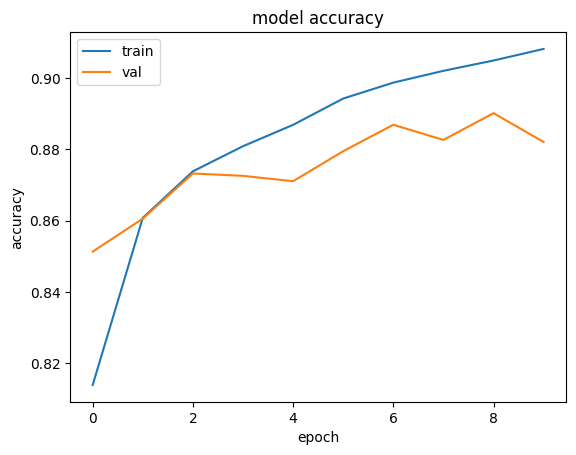

In [25]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

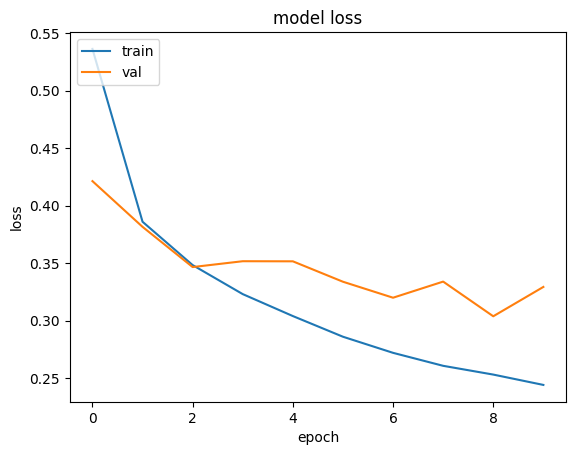

In [26]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [27]:
test_loss, test_acc = model.evaluate(x_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8717 - loss: 0.3557


In [28]:
prediction=model.predict(x_test)
prediction

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


array([[9.1845052e-08, 3.4247651e-09, 6.7194769e-08, ..., 9.5622009e-03,
        1.1947138e-07, 9.8862898e-01],
       [3.5432950e-05, 9.5148218e-09, 9.9502856e-01, ..., 1.2945080e-12,
        3.2847808e-07, 1.2240335e-09],
       [1.7706536e-10, 9.9999994e-01, 2.3363034e-11, ..., 1.0806989e-19,
        6.7774947e-13, 1.7316446e-16],
       ...,
       [7.6407568e-06, 6.5417272e-10, 6.8678237e-06, ..., 7.7026068e-12,
        9.9980927e-01, 2.6550890e-12],
       [1.8219183e-08, 9.9999088e-01, 2.0091555e-07, ..., 2.1508805e-11,
        1.3485687e-08, 9.5579340e-09],
       [5.2239966e-06, 1.0232264e-09, 6.3910255e-07, ..., 5.6221186e-05,
        4.2727566e-05, 2.6036357e-06]], dtype=float32)

In [29]:
prediction_vect = np.array([i.argmax() for i in prediction])
prediction_vect

array([9, 2, 1, ..., 8, 1, 5])

In [30]:
y_test_labels = np.argmax(y_test, axis=1)
df = pd.crosstab(pd.Series(y_test_labels), pd.Series(prediction_vect))
df

col_0,0,1,2,3,4,5,6,7,8,9
row_0,,,,,,,,,,
0,724,5,22,25,9,1,202,0,12,0
1,0,980,0,12,4,0,2,0,2,0
2,9,0,758,10,133,0,89,0,1,0
3,8,17,15,854,67,1,32,0,6,0
4,0,0,60,12,862,0,62,0,4,0
5,0,0,0,0,0,963,0,19,1,17
6,54,1,69,23,73,0,767,0,13,0
7,0,0,0,0,0,27,0,901,0,72
8,2,0,4,3,6,3,2,8,972,0


In [31]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder()
prediction_vect_multilabel = encoder.fit_transform(np.array(prediction_vect).reshape(-1, 1))
prediction_vect_multilabel

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 10000 stored elements and shape (10000, 10)>

In [32]:
print('accuracy:', accuracy_score(y_test, prediction_vect_multilabel))
print('precision:', precision_score(y_test, prediction_vect_multilabel, average='weighted'))
print('recall:', recall_score(y_test, prediction_vect_multilabel, average='weighted'))

accuracy: 0.8746
precision: 0.880327388184207
recall: 0.8746


## 3. Создайте полносвязную сеть для решения задачи классификации CIFAR10.

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


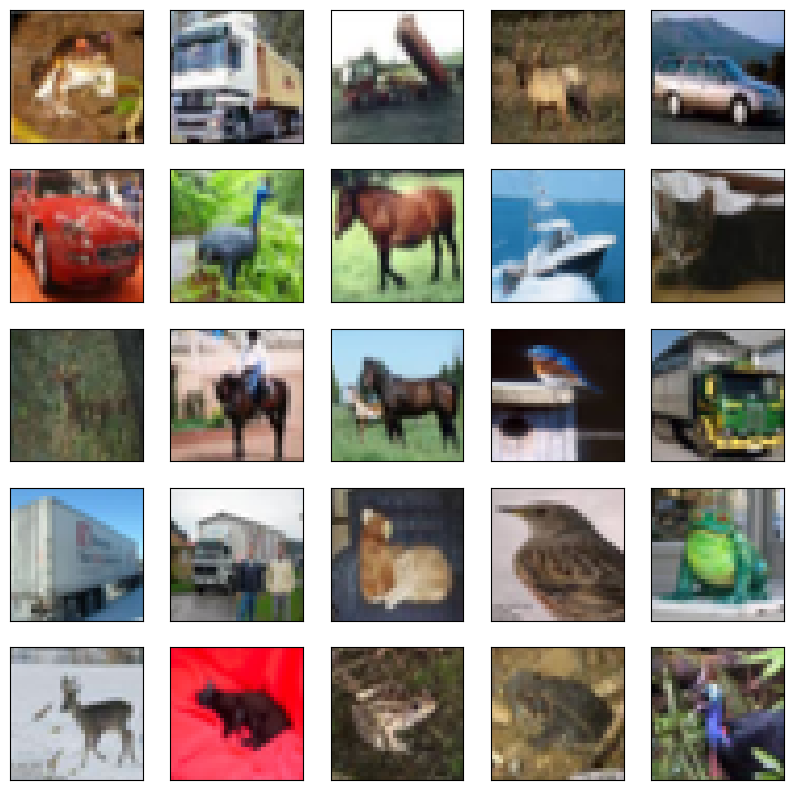

In [33]:
from keras.datasets import cifar10

(x_train, y_train), (x_test, y_test) = cifar10.load_data()

def plot_images(images, labels, n=25):
    plt.figure(figsize=(10,10))
    for i in range(n):
        plt.subplot(5, 5, i+1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        plt.imshow(images[i])
    plt.show()

plot_images(x_train, y_train, n=25)

In [34]:
x_train, x_test = x_train / 255.0, x_test / 255.0

In [35]:
y_train = np.reshape(y_train, (len(y_train),))
y_test = np.reshape(y_test, (len(y_test),))

In [36]:
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

In [37]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(50000, 32, 32, 3)
(10000, 32, 32, 3)
(50000, 10)
(10000, 10)


In [38]:
model = tf.keras.Sequential([
    keras.layers.Flatten(input_shape=(32, 32, 3)),
    keras.layers.Dense(256, activation='relu'),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [39]:
model.compile(optimizer='adam',
               loss='categorical_crossentropy',
               metrics=['accuracy'])

In [40]:
history = model.fit(x_train, y_train,
          epochs=10,
          batch_size=64,
          validation_split=0.2,
          verbose=1)

Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 15s 20ms/step - accuracy: 0.2493 - loss: 2.0519 - val_accuracy: 0.3638 - val_loss: 1.7808
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 13s 20ms/step - accuracy: 0.3783 - loss: 1.7399 - val_accuracy: 0.3864 - val_loss: 1.6953
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 21s 20ms/step - accuracy: 0.4099 - loss: 1.6443 - val_accuracy: 0.4198 - val_loss: 1.6237
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 20s 20ms/step - accuracy: 0.4338 - loss: 1.5836 - val_accuracy: 0.4303 - val_loss: 1.5876
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 12s 20ms/step - accuracy: 0.4505 - loss: 1.5356 - val_accuracy: 0.4317 - val_loss: 1.5827
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 20s 19ms/step - accuracy: 0.4606 - loss: 1.4978 - val_accuracy: 0.4482 - val_loss: 1.5608
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 12s 20ms/step - accuracy: 0.4785 - loss: 1.4602 - val_accuracy: 0.4653 - val_loss: 1.5226
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 21s 20ms/step - accuracy: 0.4811 - loss: 1.4556 - 

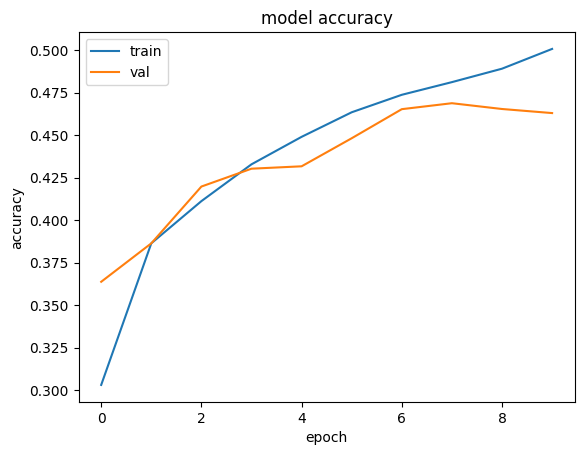

In [41]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

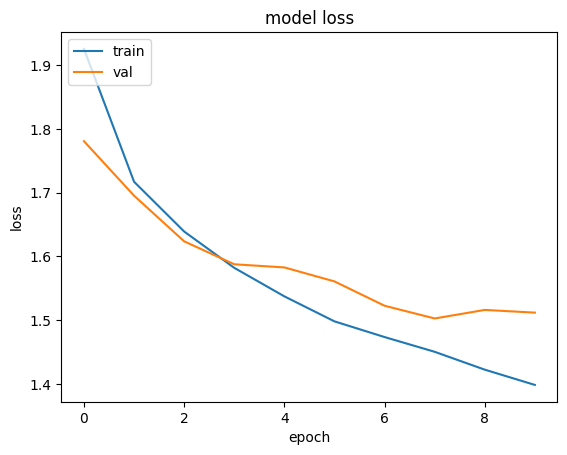

In [42]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [43]:
test_loss, test_acc = model.evaluate(x_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.4726 - loss: 1.4794


In [44]:
prediction=model.predict(x_test)
prediction

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


array([[0.0422244 , 0.24024731, 0.03833951, ..., 0.0117359 , 0.35117874,
        0.04091687],
       [0.04366992, 0.24850936, 0.02558189, ..., 0.00197634, 0.27304596,
        0.38375336],
       [0.25998935, 0.18093915, 0.02097441, ..., 0.01097254, 0.3518664 ,
        0.13563304],
       ...,
       [0.00944889, 0.0030714 , 0.0819578 , ..., 0.05018043, 0.01735249,
        0.00302007],
       [0.03033902, 0.00528754, 0.25913283, ..., 0.07044126, 0.00187631,
        0.00410795],
       [0.02782796, 0.00771076, 0.09933495, ..., 0.6833706 , 0.00163172,
        0.00395289]], dtype=float32)

In [45]:
prediction_vect = np.array([i.argmax() for i in prediction])
prediction_vect

array([8, 9, 8, ..., 3, 5, 7])

In [46]:
y_test_labels = np.argmax(y_test, axis=1)
df = pd.crosstab(pd.Series(y_test_labels), pd.Series(prediction_vect))
df

col_0,0,1,2,3,4,5,6,7,8,9
row_0,,,,,,,,,,
0,574,73,81,13,30,25,18,51,102,33
1,30,698,21,16,9,29,17,41,39,100
2,89,31,400,48,92,95,87,125,16,17
3,31,33,134,250,65,234,102,92,20,39
4,64,20,201,35,365,52,89,154,12,8
5,21,20,125,151,53,394,81,127,17,11
6,12,23,144,62,119,65,494,58,9,14
7,43,32,67,45,55,74,24,620,8,32
8,171,123,29,15,31,22,10,32,508,59


In [47]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder()
prediction_vect_multilabel = encoder.fit_transform(np.array(prediction_vect).reshape(-1, 1))
prediction_vect_multilabel

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 10000 stored elements and shape (10000, 10)>

In [48]:
print('accuracy:', accuracy_score(y_test, prediction_vect_multilabel))
print('precision:', precision_score(y_test, prediction_vect_multilabel, average='weighted'))
print('recall:', recall_score(y_test, prediction_vect_multilabel, average='weighted'))

accuracy: 0.4775
precision: 0.4835375283681396
recall: 0.4775
